In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer,RobustScaler
from sklearn.model_selection import cross_val_score
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

import category_encoders as ce
from category_encoders import WOEEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder, LeaveOneOutEncoder, JamesSteinEncoder, MEstimateEncoder

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler
from mlxtend.evaluate import feature_importance_permutation
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

from sklearn.svm import SVC

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import make_pipeline
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.classifier import StackingCVClassifier

In [3]:
from imblearn.over_sampling import SMOTE

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('num_cols.csv')
df.head()

,Unnamed: 0,gps_height,longitude,latitude,population,public_meeting,permit,construction_year,status_code,payment_value,region_number,funder_code,installer_code,basin_code,extraction_code,management_code,quality_code,quantity_code,source_code,waterpoint_code
0,0,1390,34.938093,-9.856322,109,True,False,1999,1,1,3,11,10,1,1,7,6,1,8,1
1,1,1399,34.698766,-2.147466,280,True,True,2010,1,0,9,11,10,4,1,11,6,2,5,1
2,2,686,37.460664,-3.821329,250,True,True,2009,1,1,8,11,16,5,1,7,6,1,0,2
3,3,263,38.486161,-11.155298,58,True,True,1986,0,0,12,16,10,7,10,7,6,0,3,2
4,4,0,31.130847,-1.825359,281,True,True,2000,1,0,4,11,10,4,1,1,6,3,5,1


In [5]:
df1=pd.read_csv('training_set_labels.csv')
df1

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [6]:
df1['status_group']=df1['status_group'].replace('functional',2).replace('functional needs repair',1).replace('non functional',0)
df1

,id,status_group
0,69572,2
1,8776,2
2,34310,2
3,67743,0
4,19728,2
...,...,...
59395,60739,2
59396,27263,2
59397,37057,2
59398,31282,2


In [7]:
df['status_group']=df1['status_group']
df['status_group'].value_counts()

2    32259
0    22824
1     4317
Name: status_group, dtype: int64

In [8]:
# functional = 2
# non functional = 0 
# functional needs repair = 1

In [9]:
df.drop(columns=['Unnamed: 0'],inplace=True )

In [10]:
df['permit'] = df['permit'].astype(bool).astype(int) #changing from True/False to 0-1
df['public_meeting'] = df['public_meeting'].astype(bool).astype(int) #changing from True/False to 0-1

In [11]:
target='status_group'

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 20 columns):
gps_height           59400 non-null int64
longitude            59400 non-null float64
latitude             59400 non-null float64
population           59400 non-null int64
public_meeting       59400 non-null int32
permit               59400 non-null int32
construction_year    59400 non-null int64
status_code          59400 non-null int64
payment_value        59400 non-null int64
region_number        59400 non-null int64
funder_code          59400 non-null int64
installer_code       59400 non-null int64
basin_code           59400 non-null int64
extraction_code      59400 non-null int64
management_code      59400 non-null int64
quality_code         59400 non-null int64
quantity_code        59400 non-null int64
source_code          59400 non-null int64
waterpoint_code      59400 non-null int64
status_group         59400 non-null int64
dtypes: float64(2), int32(2), int64(16)
memory 

In [13]:
used_cols = [c for c in df.columns.tolist() if c not in [target]]
X=df[used_cols]
y=df[target]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# random forest
rf = RandomForestClassifier(n_jobs=2, random_state=0)
rf.fit(X_train,y_train)

y_pred=rf.predict(X_train)
y_score=rf.predict(X_test)

print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_score)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_score)}")

Accuracy:
TRAIN: 0.9973063973063973
TEST: 0.938047138047138

Balanced Accuracy:
TRAIN: 0.9898545299602747
TEST: 0.7844872230473298


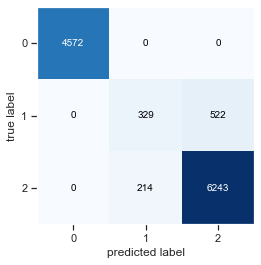

In [84]:
cm = confusion_matrix(y_test, y_score)
plot_confusion_matrix(cm)
plt.show()

In [16]:
# Decision Tree
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred1=dt.predict(X_train)
y_score1=dt.predict(X_test)

print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred1)}")
print(f"TEST: {accuracy_score(y_test, y_score1)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred1)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_score1)}")

Accuracy:
TRAIN: 0.9973274410774411
TEST: 0.9198653198653198

Balanced Accuracy:
TRAIN: 0.9903669695294028
TEST: 0.7937408828453937


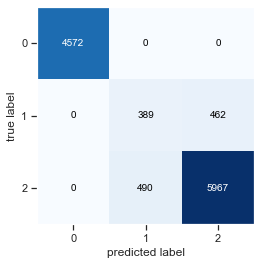

In [18]:
cm1 = confusion_matrix(y_test, y_score1)
plot_confusion_matrix(cm1)
plt.show()

In [17]:
# XGBoost
boost=XGBClassifier()

boost.fit(X_train,y_train)

y_pred2=boost.predict(X_train)
y_score2=boost.predict(X_test)

print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred2)}")
print(f"TEST: {accuracy_score(y_test, y_score2)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred2)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_score2)}")

Accuracy:
TRAIN: 0.9337542087542088
TEST: 0.9335016835016835

Balanced Accuracy:
TRAIN: 0.7059078294006293
TEST: 0.7014424447947891


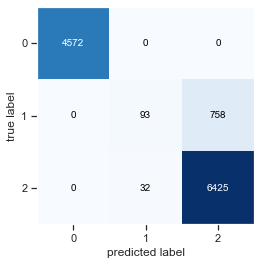

In [22]:
cm2 = confusion_matrix(y_test, y_score2)
plot_confusion_matrix(cm2)
plt.show()

In [21]:
# SVM
from sklearn.svm import LinearSVC

svm=LinearSVC(random_state=0)
svm.fit(X_train,y_train)

y_pred3=svm.predict(X_train)
y_score3=svm.predict(X_test)

print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred3)}")
print(f"TEST: {accuracy_score(y_test, y_score3)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred3)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_score3)}")

Accuracy:
TRAIN: 0.9261574074074074
TEST: 0.927020202020202

Balanced Accuracy:
TRAIN: 0.6663395387366728
TEST: 0.6661807621736516


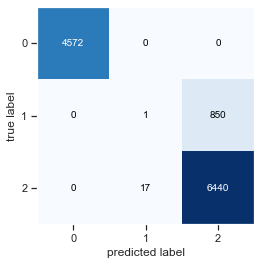

In [23]:
cm3 = confusion_matrix(y_test, y_score3)
plot_confusion_matrix(cm3)
plt.show()

In [24]:
# Logistic Regression
from sklearn.linear_model import SGDClassifier

lr = SGDClassifier(loss='log',random_state=0)

lr.fit(X_train,y_train)

y_pred4=lr.predict(X_train)
y_score4=lr.predict(X_test)

print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred4)}")
print(f"TEST: {accuracy_score(y_test, y_score4)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred4)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_score4)}")

Accuracy:
TRAIN: 0.5520412457912458
TEST: 0.5524410774410774

Balanced Accuracy:
TRAIN: 0.34120461684564246
TEST: 0.34106153397491984


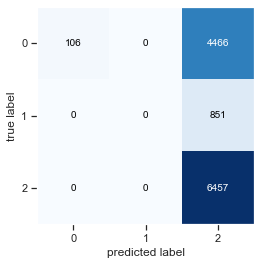

In [25]:
cm4 = confusion_matrix(y_test, y_score4)
plot_confusion_matrix(cm4)
plt.show()